# Is the Brazilian Amazon Rainforest disappearing?
### *An analysis of the deforestation of the Amazon Rainforest in Brazil*

## Introduction

The Amazon is the largest rainforest in the world. The majority of the rainforest lies in Brazil, with 60% within its borders. It's one of the most important ecosystems in the world, as one in ten known species in the world can be found in the Amazon. The rainforest is also important in the battle against climate change. The conservation of the Amazon is important as it absorbs around 2 billion tons of CO2 per year or about 5% of anual emissions. Amid the news surrounding COVID-19, the issue of Amazon deforestation continues to persist. After researching about this problem, I was curious about the data behind deforestation particularly in the Brazillian Amazon.

Sources:
<br> https://en.wikipedia.org/wiki/Amazon_rainforest <br> https://abcnews.go.com/International/deforestation-amazon-rainforest-accelerates-amid-covid-19-pandemic/story?id=70526188

In [560]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import folium 
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.pipeline import Pipeline
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

## Importing Data

Data Sources: 
<br>
https://www.kaggle.com/mbogernetto/brazilian-amazon-rainforest-degradation
<br>
https://fred.stlouisfed.org/series/INTGSTBRM193N

In [561]:
deforest_data = pd.read_csv('deforestation_2004_2019.csv')
deforest_data

,Ano/Estados,AC,AM,AP,MA,MT,PA,RO,RR,TO,AMZ LEGAL
0,2004,728,1232,46,755,11814,8870,3858,311,158,27772
1,2005,592,775,33,922,7145,5899,3244,133,271,19014
2,2006,398,788,30,674,4333,5659,2049,231,124,14286
3,2007,184,610,39,631,2678,5526,1611,309,63,11651
4,2008,254,604,100,1271,3258,5607,1136,574,107,12911
5,2009,167,405,70,828,1049,4281,482,121,61,7464
6,2010,259,595,53,712,871,3770,435,256,49,7000
7,2011,280,502,66,396,1120,3008,865,141,40,6418
8,2012,305,523,27,269,757,1741,773,124,52,4571
9,2013,221,583,23,403,1139,2346,932,170,74,5891


In [562]:
br_interest_rates = pd.read_csv('brazil_ir_gs_tb_2004_2020.csv').drop([0])
br_interest_rates

,DATE,INTGSTBRM193N
1,2004-01-01,15.4190
2,2004-02-01,16.0430
3,2004-03-01,15.5460
4,2004-04-01,15.8200
5,2004-05-01,18.1470
...,...,...
194,2020-02-01,3.9608
195,2020-03-01,3.3784
196,2020-04-01,3.0123
197,2020-05-01,2.5338


In [563]:
fires_data = pd.read_csv('inpe_brazilian_amazon_fires_1999_2019.csv')
fires_data 

,year,month,state,latitude,longitude,firespots
0,1999,1,AMAZONAS,-2.371113,-59.899933,3
1,1999,1,MARANHAO,-2.257395,-45.487831,36
2,1999,1,MATO GROSSO,-12.660633,-55.057989,18
3,1999,1,PARA,-2.474820,-48.546967,87
4,1999,1,RONDONIA,-12.861700,-60.513100,1
...,...,...,...,...,...,...
2099,2019,12,MATO GROSSO,-12.138385,-56.066297,148
2100,2019,12,PARA,-2.976727,-50.909316,1280
2101,2019,12,RONDONIA,-10.809262,-62.890452,42
2102,2019,12,RORAIMA,2.856667,-60.431963,27


## Data Cleaning & Exploratory Data Analysis

### Deforestation Data

The first thing I wanted to take a look at was the total Amazn deforestation that occured each year in Brazil. I appended a new column that was the sum of all of the deforestation in each state per year. The dataset comes from PRODES, which is a Brazillian organization that monitors the Amazon rainforest, and contains data from 2004 to 2019.

In [564]:
# RENAMING COLUMNS IN DEFOREST DATA
deforest_upd = deforest_data.rename(columns={'Ano/Estados': 'Year', 'AC': 'Acre', 'AM': 'Amazonas','AP': 'Amapa',
                                              'MA': 'Maranhao', 'MT': 'Mato Grosso', 'PA': 'Para', 'RO': 'Rondonia', 
                                              'RR': 'Roraima', 'TO': 'Tocantins', 'AMZ LEGAL': 'Total df area (km²)'})

deforest_upd.head(5)

,Year,Acre,Amazonas,Amapa,Maranhao,Mato Grosso,Para,Rondonia,Roraima,Tocantins,Total df area (km²)
0,2004,728,1232,46,755,11814,8870,3858,311,158,27772
1,2005,592,775,33,922,7145,5899,3244,133,271,19014
2,2006,398,788,30,674,4333,5659,2049,231,124,14286
3,2007,184,610,39,631,2678,5526,1611,309,63,11651
4,2008,254,604,100,1271,3258,5607,1136,574,107,12911


To visualize this data, I decided to create a line plot that displays the deforested area over each year.

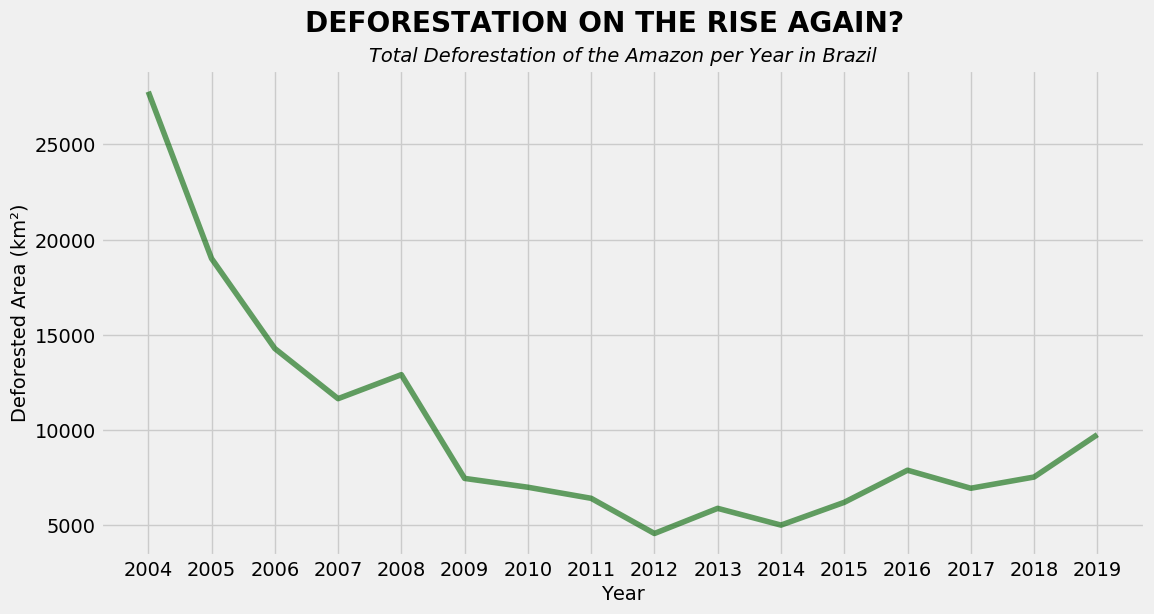

In [565]:
# Creating area chart
plt.figure(figsize=(12,6), dpi=100)
plt.style.use('fivethirtyeight')
plt.plot(deforest_upd['Year'], deforest_upd['Total df area (km²)'], color="darkgreen", alpha=0.6)
plt.xlabel('Year',fontsize='medium')
plt.ylabel('Deforested Area (km²)',fontsize='medium')
plt.suptitle('DEFORESTATION ON THE RISE AGAIN?', fontweight='bold', fontsize='x-large')
plt.title('Total Deforestation of the Amazon per Year in Brazil', fontsize='medium', style='italic')
plt.xticks(np.arange(min(deforest_upd['Year']), max(deforest_upd['Year'])+1, 1.0))
# plt.grid(axis='x')
plt.show()


In the graph, we can see that 2004 was the year with the most severe deforestation at around 30,000 km². From 2004 to 2012, there was an almost steady decline in deforestation. However, deforestation has been on the rise from 2012 to 2019 

### States

The states in Brazil where the Amazon Rainforest is located in are Acre, Amazonas, Amapa, Maranhao, Mato Grosso, Para, Rondonia, Roraima, and Tocantins.

In [566]:
# Transposing deforest_upd so that State and Years are columns
dt = deforest_upd.T 
dt_head = dt.iloc[0].rename('')
dt = dt[1:-1]
dt.columns = [str(i) for i in dt_head] 
dt = dt.reset_index()
dt = dt.rename(columns={'index': 'State'})
dt['id'] = dt.index
dt 

,State,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,id
0,Acre,728,592,398,184,254,167,259,280,305,221,309,264,372,257,444,688,0
1,Amazonas,1232,775,788,610,604,405,595,502,523,583,500,712,1129,1001,1045,1421,1
2,Amapa,46,33,30,39,100,70,53,66,27,23,31,25,17,24,24,8,2
3,Maranhao,755,922,674,631,1271,828,712,396,269,403,257,209,258,265,253,215,3
4,Mato Grosso,11814,7145,4333,2678,3258,1049,871,1120,757,1139,1075,1601,1489,1561,1490,1685,4
5,Para,8870,5899,5659,5526,5607,4281,3770,3008,1741,2346,1887,2153,2992,2433,2744,3862,5
6,Rondonia,3858,3244,2049,1611,1136,482,435,865,773,932,684,1030,1376,1243,1316,1245,6
7,Roraima,311,133,231,309,574,121,256,141,124,170,219,156,202,132,195,617,7
8,Tocantins,158,271,124,63,107,61,49,40,52,74,50,57,58,31,25,21,8


In [567]:
# Converting dataframe from wide to long in order to categorize by years
w2l = pd.wide_to_long(dt, ['20'], i='id', j='Year')
w2l = w2l.reset_index()
w2l = w2l.drop(['id'],axis=1)
w2l['Year'] = 2000 + w2l['Year']
w2l = w2l.rename(columns={'20':'Deforested Area (km²)'}) # Renaming last column
w2l.head()

,Year,State,Deforested Area (km²)
0,2004,Acre,728
1,2004,Amazonas,1232
2,2004,Amapa,46
3,2004,Maranhao,755
4,2004,Mato Grosso,11814


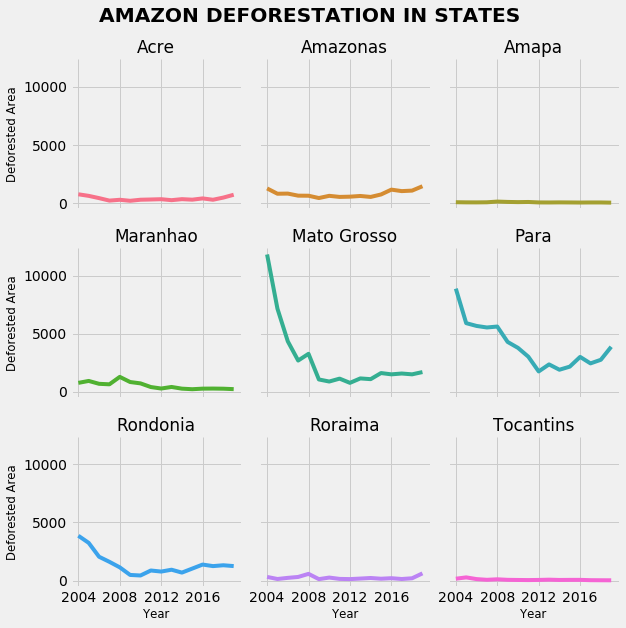

In [568]:
# Creating an area chart for each state that includes the Amazon showing the deforestation from 2004 - 2019
plt.style.use('fivethirtyeight')
g = sns.FacetGrid(w2l, col='State', hue='State', col_wrap=3)
g = g.map(plt.plot, 'Year','Deforested Area (km²)').set_titles('{col_name}')

g.axes[0].set_ylabel('Deforested Area', fontsize='small')
g.axes[3].set_ylabel('Deforested Area', fontsize='small')
g.axes[6].set_ylabel('Deforested Area', fontsize='small')
g.axes[6].set_xlabel('Year', fontsize='small')
g.axes[7].set_xlabel('Year', fontsize='small')
g.axes[8].set_xlabel('Year', fontsize='small')

plt.subplots_adjust(top=0.9)
g = g.fig.suptitle('AMAZON DEFORESTATION IN STATES', fontsize='x-large', fontweight='bold')
plt.xticks(np.arange(min(w2l['Year']), max(w2l['Year'])+1, 4.0))
plt.show()

Here we can see that the main states have account for most of the Amazon deforestation are Mato Grosso, Para, and Rondonia. Within these states, we can also see that the deforestation for each year is consistent with total deforestation per year in Brazil. The deforestation is the worst in 2004, declining until 2012. From 2012, the deforestation starts increasing again

In [569]:
# Grouping by state
state_group = w2l.groupby('State').sum()
state_group = state_group.reset_index()
state_group = state_group.drop(['Year'], axis=1)
state_group = state_group.sort_values('Deforested Area (km²)',ascending=False)
state_group

,State,Deforested Area (km²)
5,Para,62778
4,Mato Grosso,43065
6,Rondonia,22279
2,Amazonas,12425
3,Maranhao,8318
0,Acre,5722
7,Roraima,3891
8,Tocantins,1241
1,Amapa,616


Here's another visualization of deforestation in each state:

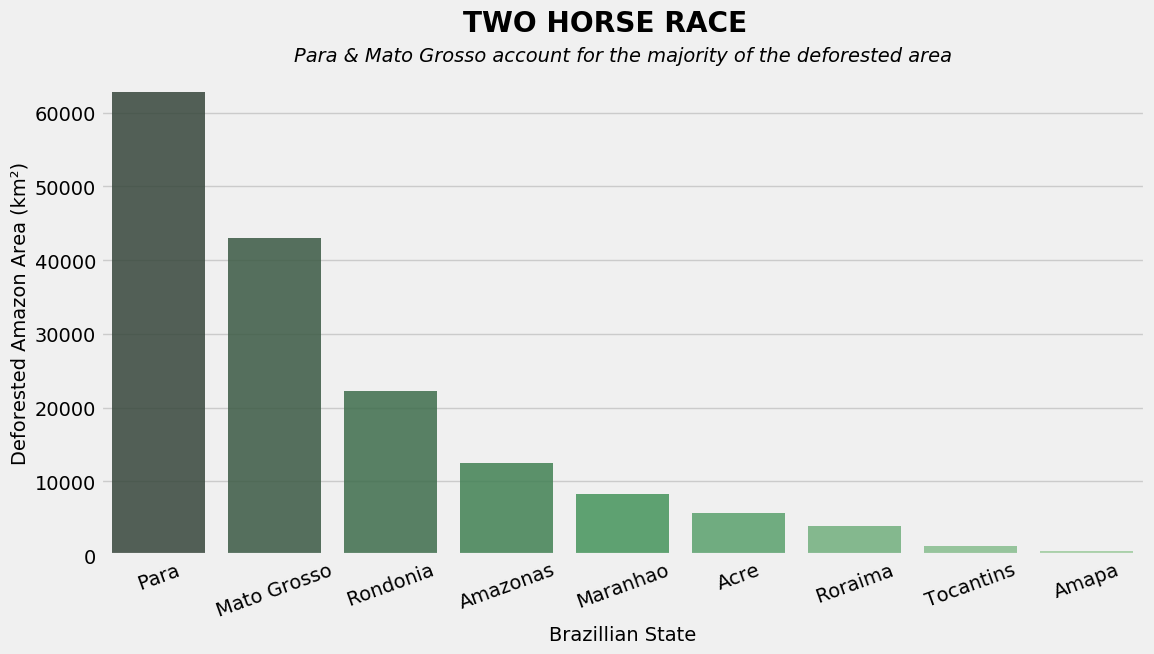

In [570]:
plt.figure(figsize=(12,6), dpi=100)
plt.style.use('fivethirtyeight')
sns.barplot(x= state_group['State'], y=state_group['Deforested Area (km²)'], palette = "Greens_d", alpha = 0.85)
plt.xlabel('Brazillian State', fontsize='medium')
plt.ylabel('Deforested Amazon Area (km²)', fontsize='medium')
plt.suptitle('TWO HORSE RACE', fontweight='bold', fontsize='x-large')
plt.title('Para & Mato Grosso account for the majority of the deforested area', fontsize='medium', style='italic')
# plt.grid(axis='x')
plt.xticks(rotation=20)
plt.show()

After calculating the cumulative deforestation for each state, we can see that Para and Mato Grosso are far and away the two states with the most deforestation. Para and Mato Grasso account for over 100,000 km² of deforested area, while the other states combine for less thatn 60,000 km².

In [571]:
fl = deforest_upd.set_index('Year')
tot = fl.T.iloc[[-1]]
summed = tot.cumsum(axis=1).T.reset_index()
summed.head(5) 

,Year,Total df area (km²)
0,2004,27772
1,2005,46786
2,2006,61072
3,2007,72723
4,2008,85634


### Cumulative 

After investigating the per year deforestation, I was interested in how much cumulative area has been removed from the Brazillian Amazon.

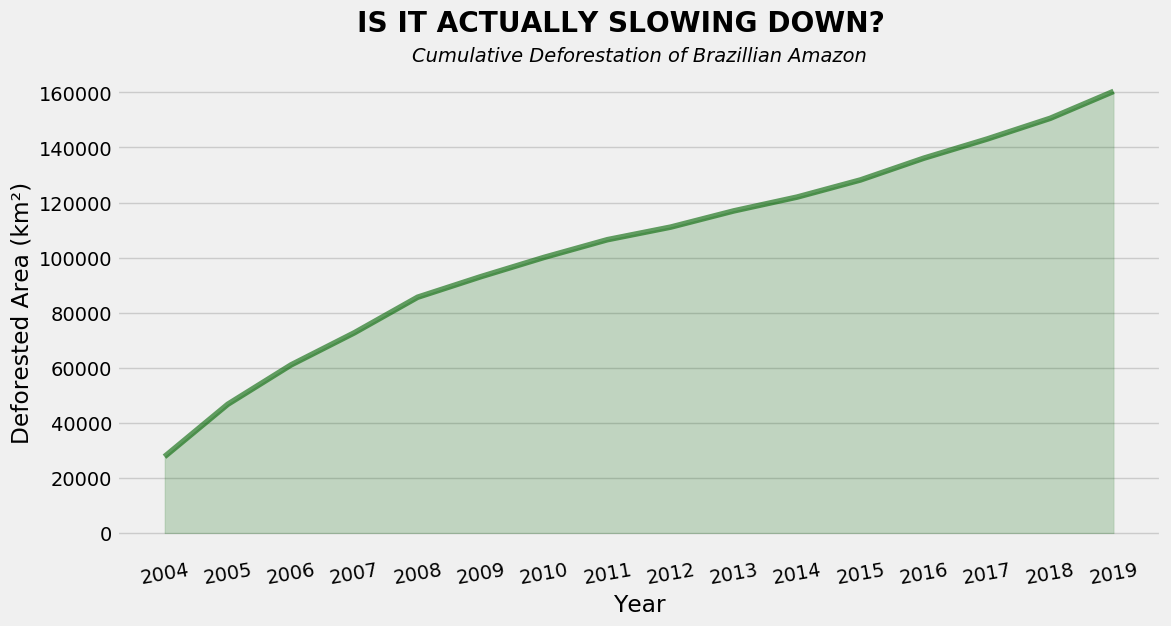

In [572]:
plt.figure(figsize=(12,6), dpi=100)
plt.style.use('fivethirtyeight')
plt.fill_between(summed['Year'], summed['Total df area (km²)'], color="darkgreen", alpha=0.2)
plt.plot(summed['Year'], summed['Total df area (km²)'], color="darkgreen", alpha=0.6)
plt.xlabel('Year')
plt.ylabel('Deforested Area (km²)')
plt.suptitle('IS IT ACTUALLY SLOWING DOWN?', fontweight='bold', fontsize='x-large')
plt.title('Cumulative Deforestation of Brazillian Amazon', fontsize='medium', style='italic')
plt.xticks(np.arange(min(summed['Year']), max(summed['Year'])+1, 1.0),rotation=10)
plt.grid(axis='x')
plt.show()

The cumulative area plot puts into perspective how much of the Amazon has been deforested in Brazil. From 2004 to 2019, around 160,000 km² of the Amazon has been removed. The Brazillian Amazon is about 5,500,000 km² in size, which means from 2004 to 2019, 2.9% of the Brazillian Amazon has been deforested. From the previous charts,it seemed like deforestation has halted or slowed down in 2012. From 2012 to 2019, however, around 50,000 km² of the rainforest has been cut down which is still almost 1% of the entire Brazillian rainforest.  

### Presidents

The change in rates of deforestation made me curious as to why it fluctuated the way it did. I decided to see if different presidents had influence on how much Amazon was being deforested. I added the presidents into the dataframe by the approximate year they came into office.

In [573]:
# Adding the Brazillian President Column, whose values are the President during that Year
p_years = [
    (w2l['Year'] > 2003) & (w2l['Year'] <= 2010),
    (w2l['Year'] >= 2011) & (w2l['Year'] <= 2016),
    (w2l['Year'] > 2016) & (w2l['Year'] <= 2018),
    (w2l['Year'] >= 2019),
    ]
pres = ['Luiz Inacio Lula da Silva', 'Dilma Rousseff', 'Michael Temer', 'Jair Bolsonaro']
w2l['President'] = np.select(p_years, pres)
w2l.head(5)

,Year,State,Deforested Area (km²),President
0,2004,Acre,728,Luiz Inacio Lula da Silva
1,2004,Amazonas,1232,Luiz Inacio Lula da Silva
2,2004,Amapa,46,Luiz Inacio Lula da Silva
3,2004,Maranhao,755,Luiz Inacio Lula da Silva
4,2004,Mato Grosso,11814,Luiz Inacio Lula da Silva


In [574]:
# Grouping by President and getting the summed area per president
cg = w2l.groupby('President').agg({'Year':['min','max'], 'Deforested Area (km²)':'sum'})
cg = cg.sort_values(by=[('Year', 'min')])
cg.loc[cg[('Year', 'min')] == 2017, ('Year', 'min')] = 2016
cg = cg.reset_index()
cg 

President  Year       Deforested Area (km²)
                               min   max                   sum
0  Luiz Inacio Lula da Silva  2004  2010                100098
1             Dilma Rousseff  2011  2016                 35992
2              Michael Temer  2016  2018                 14483
3             Jair Bolsonaro  2019  2019                  9762

The first thing I looked at with the presidents was the cumulative deforested area.

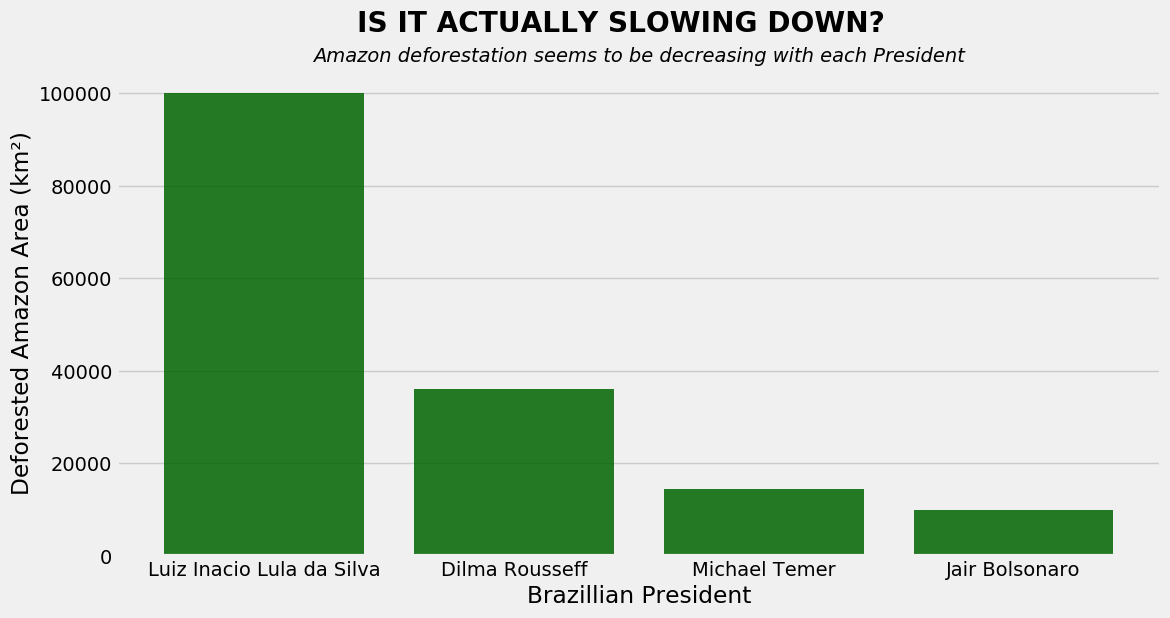

In [575]:
plt.figure(figsize=(12,6), dpi=100)
plt.style.use('fivethirtyeight')
plt.bar(cg.iloc[:,0], cg.iloc[:,3], color='darkgreen', alpha=0.85)
plt.xlabel('Brazillian President')
plt.ylabel('Deforested Amazon Area (km²)')
plt.suptitle('IS IT ACTUALLY SLOWING DOWN?', fontweight='bold', fontsize='x-large')
plt.title('Amazon deforestation seems to be decreasing with each President', fontsize='medium', style='italic')
plt.grid(axis='x')
plt.show()

From this cumulative bar chart, it makes sense that Lula was responsible for the most deforestation as he was president during the 2000s. The bars of the presidents are in chronological order of when their terms were, which also makes sense.

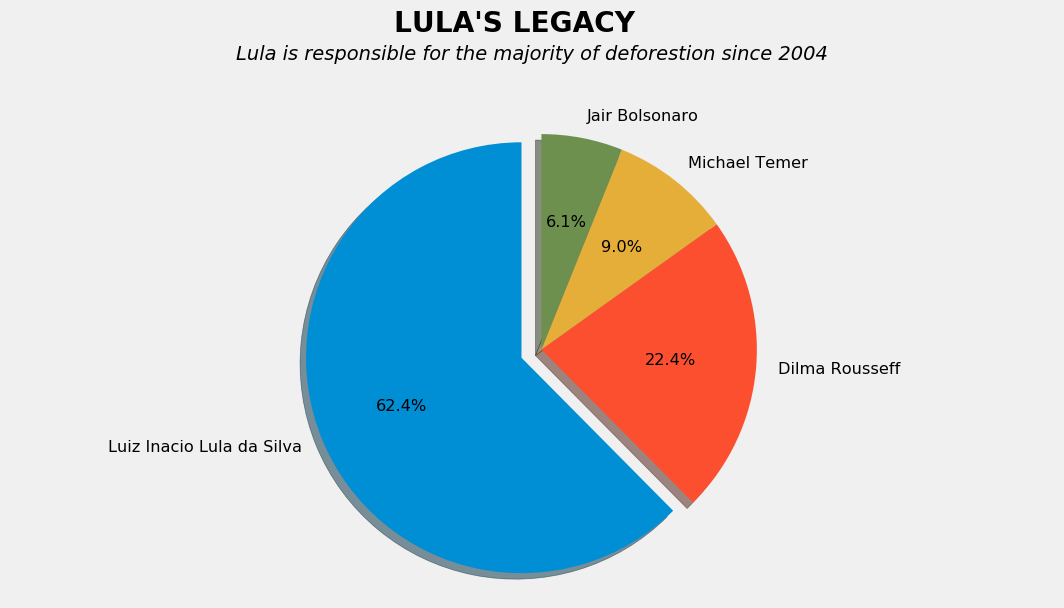

In [576]:
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize=(12,6), dpi=100)
ax.pie(cg.iloc[:,3], labels=cg['President'],explode=[0.1,0,0,0],autopct='%1.1f%%', startangle=90, shadow=True,
       textprops={'fontsize': 'small'})
ax.axis('equal')
plt.suptitle('LULA\'S LEGACY', fontweight='bold', fontsize='x-large', y= 1.05)
ax.set_title('Lula is responsible for the majority of deforestion since 2004', fontsize='medium', style='italic',y=1.09)
plt.show()

From this pie chart, it seems like Brazillian presidents seem like they're taking action against Amazon deforestation. However, this data is misleading as we haven't taken into account years into consideration. Below, I add a column that contains the deforestated area per year.

In [577]:
# Appending a column that shows deforestation per year under each president
cg['Deforest per Year'] = cg.iloc[:,3] / (cg.iloc[:,2] - cg.iloc[:,1])
cg.loc[cg['Deforest per Year'] == float('inf'), 'Deforest per Year'] = 9762
cg 

President  Year       Deforested Area (km²)  \
                               min   max                   sum   
0  Luiz Inacio Lula da Silva  2004  2010                100098   
1             Dilma Rousseff  2011  2016                 35992   
2              Michael Temer  2016  2018                 14483   
3             Jair Bolsonaro  2019  2019                  9762   

  Deforest per Year  
                     
0           16683.0  
1            7198.4  
2            7241.5  
3            9762.0

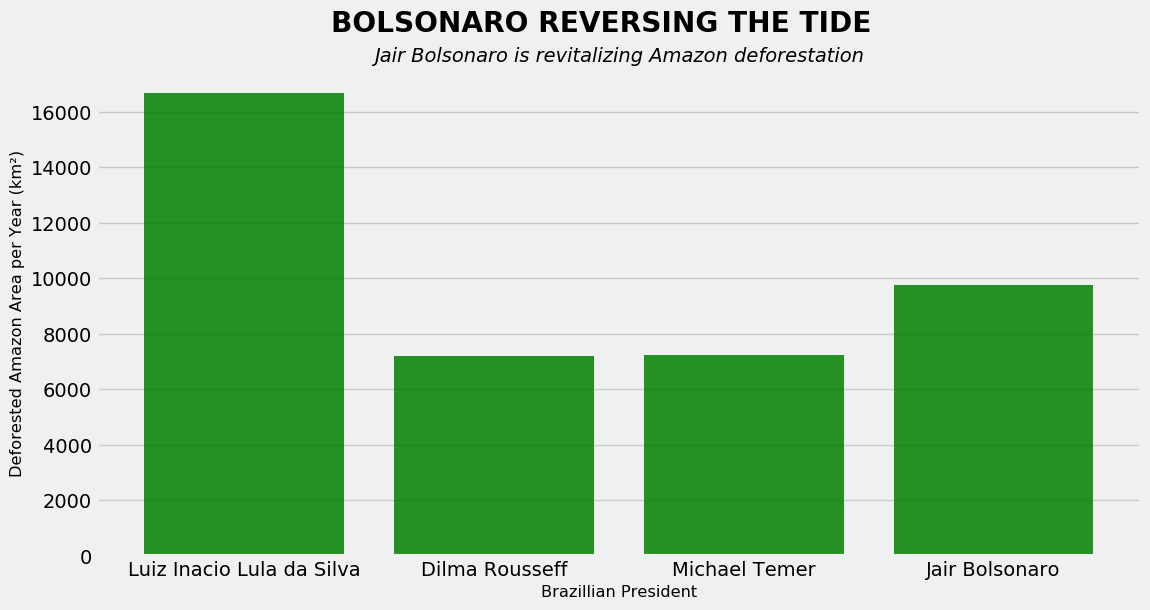

In [578]:
plt.figure(figsize=(12,6), dpi=100)
plt.style.use('fivethirtyeight')
plt.bar(cg.iloc[:,0], cg.iloc[:,4], color='green', alpha=0.85)
plt.xlabel('Brazillian President', fontsize='small')
plt.ylabel('Deforested Amazon Area per Year (km²)', fontsize='small')
plt.suptitle('BOLSONARO REVERSING THE TIDE', fontweight='bold', fontsize='x-large')
plt.title('Jair Bolsonaro is revitalizing Amazon deforestation', fontsize='medium', style='italic')
plt.grid(axis='x')
plt.show()

After adjusting for time, we can see that Brazil did reduce its deforestation of the Amazon from Luiz Inacio Lula da Silva's  to Michael Temer's term. However, with the election of Brazil's latest president Jair Bolsonaro, we can see that deforestation has actually gone up, not to the intensity of da Silva's presidency, but still worrying.

### Choropleth Visualization

These next choropleth maps help visualize where deforestation is occuring during 2004, 2010, and 2019

In [579]:
# Adjusting dataframe for choropleth map
choro_df = deforest_data.T 
choro_df_head = choro_df.iloc[0].rename('')
choro_df = choro_df[1:-1]
choro_df.columns = [str(i) for i in choro_df_head] 
choro_df = choro_df.reset_index()
choro_df = choro_df.rename(columns={'index': 'State'})
choro_df.head(5)

,State,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,AC,728,592,398,184,254,167,259,280,305,221,309,264,372,257,444,688
1,AM,1232,775,788,610,604,405,595,502,523,583,500,712,1129,1001,1045,1421
2,AP,46,33,30,39,100,70,53,66,27,23,31,25,17,24,24,8
3,MA,755,922,674,631,1271,828,712,396,269,403,257,209,258,265,253,215
4,MT,11814,7145,4333,2678,3258,1049,871,1120,757,1139,1075,1601,1489,1561,1490,1685


In [580]:
start_2004 = folium.Map(location=[-7, -55], zoom_start=5)
 
folium.Choropleth(
 geo_data='brazil.json',
 name='choropleth',
 data=choro_df,
 columns=["State", '2004'],
 key_on='feature.properties.UF',
 fill_color='YlGn',
 fill_opacity=0.7,
 line_opacity=0.2,
 legend_name='Deforested Area 2004 (km^2)'
).add_to(start_2004)
folium.LayerControl().add_to(start_2004)
start_2004 

In [581]:
start_2010 = folium.Map(location=[-7, -55], zoom_start=5)
 
folium.Choropleth(
 geo_data='brazil.json',
 name='choropleth',
 data=choro_df,
 columns=["State", '2010'],
 key_on='feature.properties.UF',
 fill_color='YlGn',
 fill_opacity=0.6,
 line_opacity=0.2,
 legend_name='Deforested Area 2004 (km^2)'
).add_to(start_2010)
folium.LayerControl().add_to(start_2010)
start_2010 

In [582]:
start_2019 = folium.Map(location=[-7, -55], zoom_start=5)
 
folium.Choropleth(
 geo_data='brazil.json',
 name='choropleth',
 data=choro_df,
 columns=["State", '2019'],
 key_on='feature.properties.UF',
 fill_color='YlGn',
 fill_opacity=0.6,
 line_opacity=0.2,
 legend_name='Deforested Area 2019 (km^2)'
).add_to(start_2019)
folium.LayerControl().add_to(start_2019)
start_2019 

 ### Fire Outbreak Data

Forest fires in the Amazon have been in the news recently. To see what impact they have on the deforestation and degredation of the Amazon, I imported in a dataset from INPE, which is a Brazillian space research organization. The dataset contains data from 1999 to 2019.

In [583]:
# Grouping fire data by year to get total firespots per year
fires_yrs = fires_data.groupby('year').sum().reset_index()
fires_yrs.head(5)

,year,month,latitude,longitude,firespots
0,1999,589,-473.114890,-4788.685739,62858
1,2000,609,-521.428326,-4919.259688,48168
2,2001,619,-461.498605,-4728.242857,69675
3,2002,655,-543.287235,-5416.566266,273873
4,2003,682,-549.815319,-5749.583563,174400


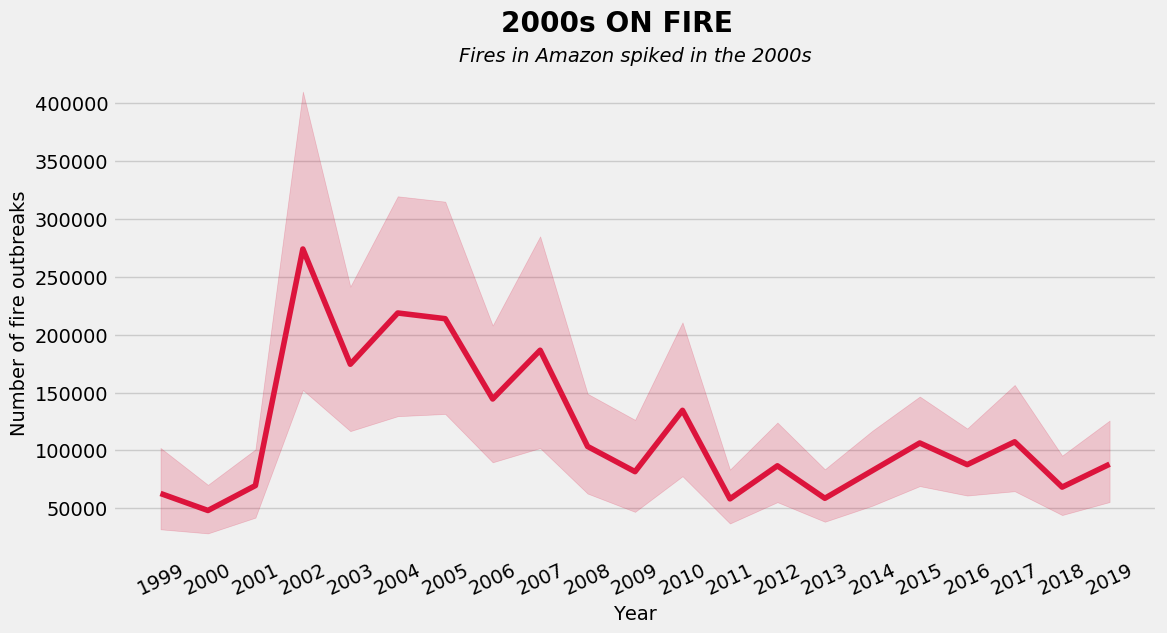

In [584]:
plt.figure(figsize=(12,6), dpi=100)
plt.style.use("fivethirtyeight")
sns.lineplot(data=fires_data, x='year', y='firespots', estimator='sum', color="crimson")
plt.ylabel("Number of fire outbreaks", size="medium")
plt.xlabel("Year", size="medium")
plt.xticks(np.arange(min(fires_data['year']), max(fires_data['year'])+1, 1.0), rotation=25)
plt.suptitle('2000s ON FIRE', fontweight='bold', fontsize='x-large')
plt.title('Fires in Amazon spiked in the 2000s', fontsize='medium', style='italic')
plt.grid(axis='x')
plt.show()

This line plot represents the total fire outbreaks in the Brazillian Amazon from 2004 to 2019. The buffer around the line represents a 95% condience band. We can see here that the most fires occurred in 2002, and then generally declined until 2011. After 2011, the number of fires had a slight positive increase until 2019. 

In [585]:
fires_sort = fires_data.groupby('state').sum().sort_values('firespots',ascending=False).reset_index()
fires_sort

,state,year,month,latitude,longitude,firespots
0,PARA,502266,1631,-1101.514913,-12795.195703,942283
1,MATO GROSSO,506268,1638,-3039.155288,-14077.387939,595378
2,RONDONIA,494266,1613,-2699.473174,-15441.722441,340517
3,AMAZONAS,502268,1628,-1076.461505,-15643.667527,188483
4,MARANHAO,484220,1602,-905.333050,-11104.831668,160543
5,ACRE,409996,1459,-1893.288606,-14271.963088,126471
6,RORAIMA,488248,1585,647.635174,-14731.108856,46981
7,AMAPA,395854,1411,171.935309,-10102.723284,39337
8,TOCANTINS,444112,1540,-1548.592427,-10729.100333,16254


### States

Like with deforestation, I was interested in the state breakdown of Amazon fires.

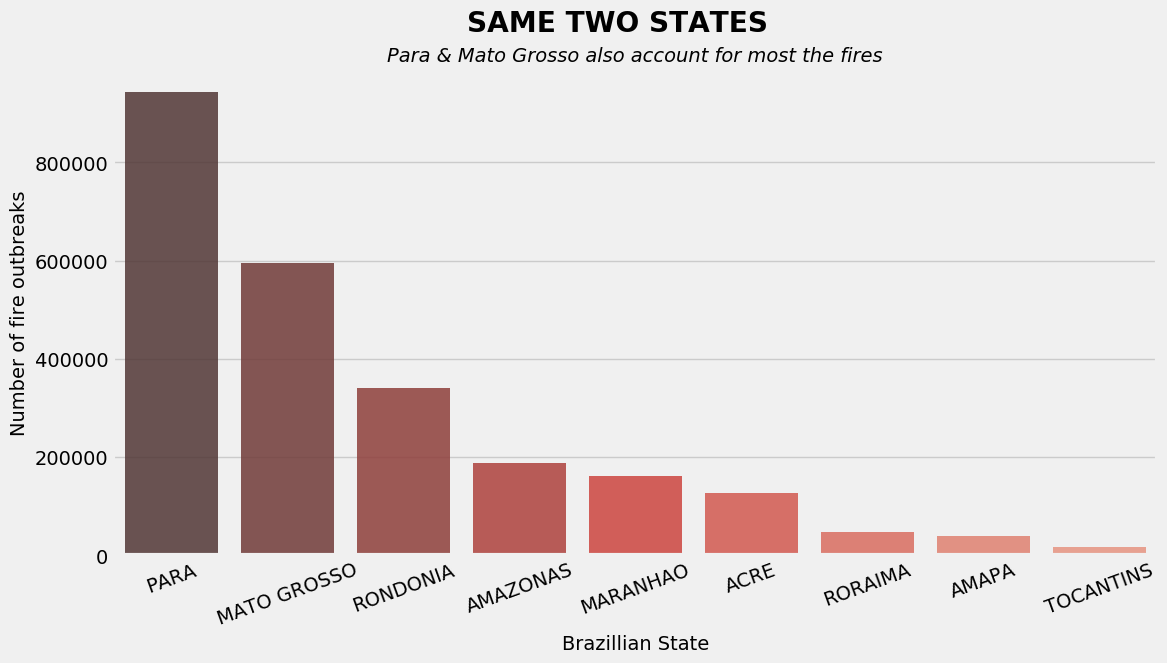

In [586]:
plt.figure(figsize=(12,6), dpi=100)
plt.style.use('fivethirtyeight')
sns.barplot(x= fires_sort['state'], y=fires_sort['firespots'], palette = "Reds_d", alpha = 0.85)
plt.ylabel('Number of fire outbreaks', fontsize='medium')
plt.xlabel('Brazillian State', fontsize='medium')
plt.suptitle('SAME TWO STATES', fontweight='bold', fontsize='x-large')
plt.title('Para & Mato Grosso also account for most the fires', fontsize='medium', style='italic')
plt.xticks(rotation=20)
# plt.grid(axis='x')

plt.show()

From this bar chart, we can see that Para and Mato Grosso also account for the majority of fires that have occurred in the Amazon. This makes sense since one would assume that the more Amazon fires that occur in a state, the more deforestation that state would have.

### Months

The dataset included months, so I was curious what the breakdown of fires would be by months.

In [587]:
# Grouping fires dataset by month and changing number to month
fires_month = fires_data.groupby('month').sum().reset_index()
fires_month['month'] = fires_month['month'].replace([1,2,3,4,5,6,7,8,9,10,11,12], 
                                                   ['January', 'February', 'March', 'April', 'May', 'June', 'July',
                                                   'August', 'September', 'October', 'November', 'December'])
fires_month = fires_month.drop(columns=['year','latitude','longitude'])
fires_month.head(5)

,month,firespots
0,January,33905
1,February,16797
2,March,22047
3,April,13930
4,May,21331


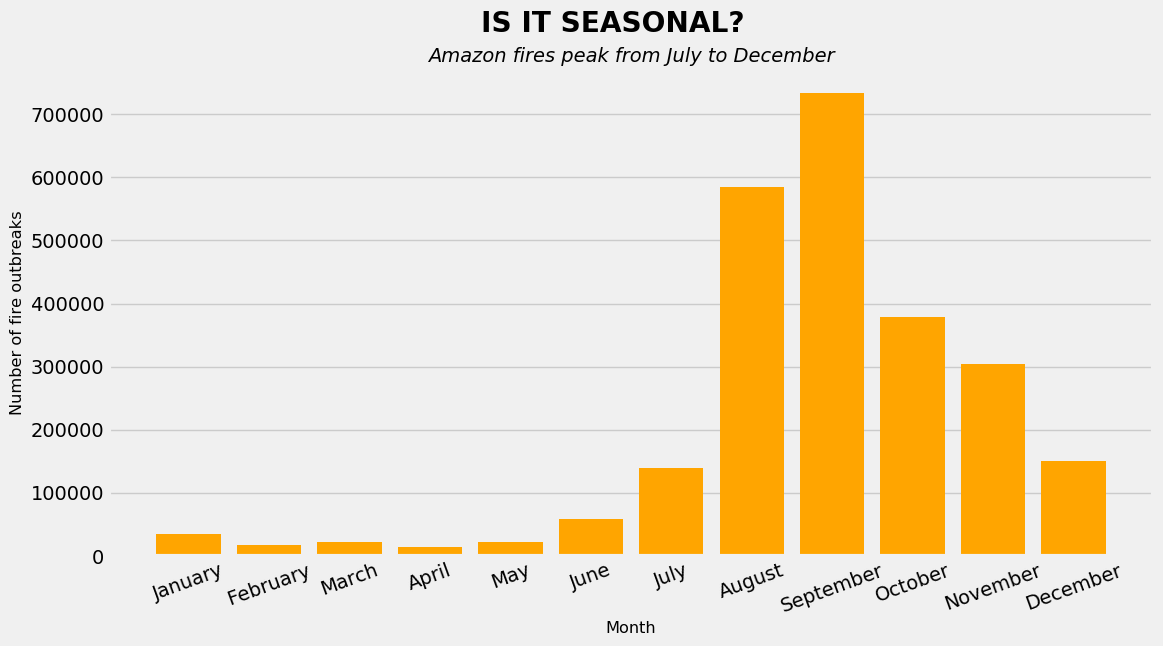

In [588]:
plt.figure(figsize=(12,6), dpi=100)
plt.style.use('fivethirtyeight')
plt.bar(fires_month['month'], fires_month['firespots'], color='orange')
plt.ylabel('Number of fire outbreaks', fontsize='small')
plt.xlabel('Month', fontsize='small')
plt.title('Total Fires in Brazil per Month  (2004-2019)')
plt.suptitle('IS IT SEASONAL?', fontweight='bold', fontsize='x-large')
plt.title('Amazon fires peak from July to December', fontsize='medium', style='italic')
plt.xticks(rotation=20)
plt.grid(axis='x')

plt.show()

We can see that the vast majority of fires in the Amazon happen during August, September, and October. A reason for the increased frequency of fires around this time could be that during this period of time, the climate is drier and there's less rainfall, leading to more fires. From January to June, the climate may be wetter, meaning more rainfall and less fires. 

### States

In [589]:
# Sorting fires dataset by state
fires_state = fires_data.sort_values(by='state')
fires_state.head(5)

,year,month,state,latitude,longitude,firespots
1904,2018,2,ACRE,-7.632000,-72.729500,2
1984,2018,11,ACRE,-9.280692,-70.440423,26
1155,2010,11,ACRE,-9.916534,-68.687362,58
1164,2010,12,ACRE,-9.996500,-69.292000,2
308,2002,8,ACRE,-9.333060,-69.366493,1486


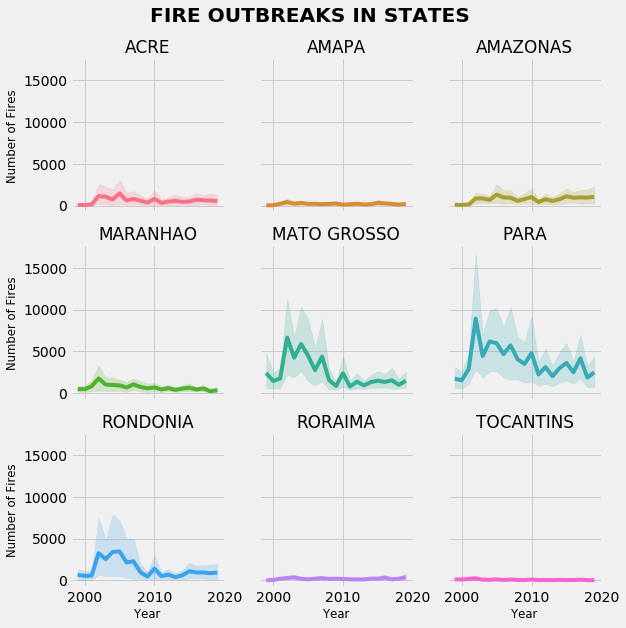

In [590]:
plt.style.use('fivethirtyeight')
g = sns.FacetGrid(fires_state, col='state', hue='state', col_wrap=3)
g = g.map(sns.lineplot, 'year', 'firespots').set_titles('{col_name}')
g.axes[0].set_ylabel('Number of Fires', fontsize='small')
g.axes[3].set_ylabel('Number of Fires', fontsize='small')
g.axes[6].set_ylabel('Number of Fires', fontsize='small')
g.axes[6].set_xlabel('Year', fontsize='small')
g.axes[7].set_xlabel('Year', fontsize='small')
g.axes[8].set_xlabel('Year', fontsize='small')
plt.subplots_adjust(top=0.9)
g = g.fig.suptitle('FIRE OUTBREAKS IN STATES', fontsize='x-large', fontweight='bold')
plt.show()

The chart shows that Mato Grosso, Para, and Rondonia are in fact the leaders in fires, and also that most of the fires occurred through the 2000s

### Comparing Fires and Deforestation

From the previously generated charts, I had a rough idea that the fires had some sort of connection or influence on the total deforestation in the Amazon. I merged the fires and deforestation datasets together as to compare the two.

In [591]:
# Merging fires and deforestation datasets
w2l = w2l.rename(columns={'Year':'year', 'State':'state'})
w2l['state'] = w2l['state'].str.upper() 
merged = w2l.merge(fires_data, on=['year', 'state'])
merged.head(5) 

,year,state,Deforested Area (km²),President,month,latitude,longitude,firespots
0,2004,ACRE,728,Luiz Inacio Lula da Silva,2,-8.150750,-72.611250,4
1,2004,ACRE,728,Luiz Inacio Lula da Silva,4,-10.887444,-68.537000,9
2,2004,ACRE,728,Luiz Inacio Lula da Silva,5,-9.346143,-70.787952,21
3,2004,ACRE,728,Luiz Inacio Lula da Silva,6,-9.390833,-69.686500,12
4,2004,ACRE,728,Luiz Inacio Lula da Silva,7,-9.350074,-68.990400,95


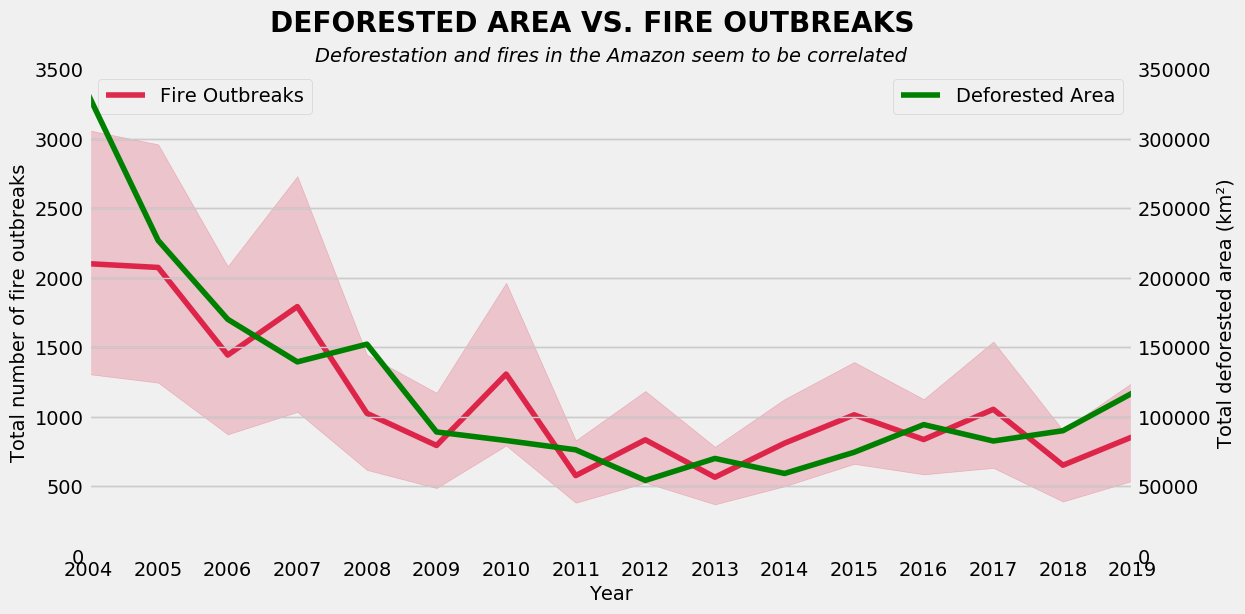

In [592]:
fig, ax = plt.subplots(figsize=(12,6), dpi=100)
plt.style.use('fivethirtyeight')

sns.lineplot(merged['year'], merged['firespots'], color='crimson', alpha=0.9, label='Fire Outbreaks')
# plt.grid(False)
ax.legend(loc= 'upper left')
ax.set_ylabel("Total number of fire outbreaks", size="medium")
ax.set_xlabel("Year", size="medium")
plt.suptitle('DEFORESTED AREA VS. FIRE OUTBREAKS', fontweight='bold', fontsize='x-large')
ax.set_ylim(0, 3500)
ax.grid(axis='x')

ax2 = ax.twinx()
sns.lineplot(x=merged['year'], y=merged['Deforested Area (km²)'], estimator='sum', color="green", ci=None, ax=ax2, label='Deforested Area')
ax2.set_xticks(ticks=list(range(2004, 2020)))
ax2.set_xlim(2004, 2019)
ax2.set_ylabel("Total deforested area (km²)", size="medium")
ax2.set_title('Deforestation and fires in the Amazon seem to be correlated', fontsize='medium', style='italic')
ax2.set_ylim(0, 350000)



# plt.grid(False)
ax2.legend();

It seems like the number of fires that occur is linked to the amount of deforestation that occurs in the Amazon. The most amount of deforestation and fires both occur in 2004, and then decline until around 2011, 2012. Both lines then rise a little from 2012 to 2019. Fires and deforestation in the Amazon seem to be related in a way based off of this chart.

### Interest Rates in Brazil

Another aspect of Amazon deforestation in Brazil I wanted to look at was the economic side. I chose to use interest rates because of the connection it has with investment. High interest rates discourages borrowing since it makes more expensive, while low interest rates encourages borrowing as it makes investing cheaper. The Brazillian interest rates dataset is from the St. Louis Federal Reserve.

In [593]:
# Renaming and cleaning columns, adding in year and month
br_int_ym = br_interest_rates.rename(columns={'INTGSTBRM193N': 'interest rate'})
new = br_int_ym['DATE'].str.split('-', n=1, expand=True)
br_int_ym['year'] = new[0].astype(int)
br_int_ym['month'] = new[1].str.rstrip('01').str.rstrip('-').astype(int)
br_int_ym = br_int_ym.drop(columns={'DATE'})
br_int_ym['date'] = br_int_ym['month'].astype(str) + '/1/' + br_int_ym['year'].astype(str).str[-2:]
br_int_ym.head(5)

,interest rate,year,month,date
1,15.419,2004,1,1/1/04
2,16.043,2004,2,2/1/04
3,15.546,2004,3,3/1/04
4,15.820,2004,4,4/1/04
5,18.147,2004,5,5/1/04


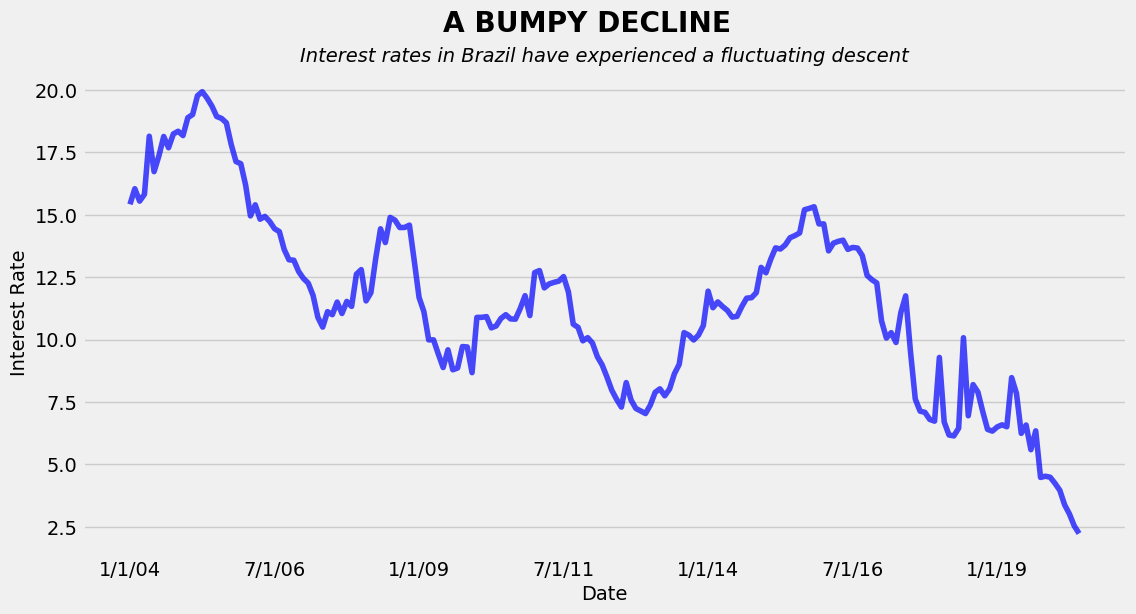

In [594]:
# plt.figure(figsize=(12,5), dpi=85)
fig, ax = plt.subplots(figsize=(12,6), dpi=100)
plt.style.use("fivethirtyeight")
plt.plot(br_int_ym['date'],br_int_ym['interest rate'], color="blue", alpha=0.7)
ax.set_ylabel("Interest Rate", size="medium")
ax.set_xlabel("Date", size="medium")
plt.suptitle('A BUMPY DECLINE', fontweight='bold', fontsize='x-large')
ax.set_title('Interest rates in Brazil have experienced a fluctuating descent', fontsize='medium', style='italic')
ax.grid(axis='x')
every_nth = 30
for n, label in enumerate(ax.xaxis.get_ticklabels()):
    if n % every_nth != 0:
        label.set_visible(False)
plt.show()

The line plot shows that interests rates had a massive range from 2004 to 2019. Rates seemed to be highest around 2005 at around 20% while the low was under 2.5% in 2019. Although it fluctuates sporadically, the interest rates in Brazil seemed to have decreased from 2004 to 2019.

### Comparing Interest Rates and Deforestation


Since interest rates also declined over the years, I wanted to compare it the deforestation data.

In [595]:
# Merging interest rate dataframe with fires and deforestation
merged = merged.merge(br_int_ym, on= ['year','month'])
merged.head(5)

,year,state,Deforested Area (km²),President,month,latitude,longitude,firespots,interest rate,date
0,2004,ACRE,728,Luiz Inacio Lula da Silva,2,-8.150750,-72.611250,4,16.043,2/1/04
1,2004,AMAZONAS,1232,Luiz Inacio Lula da Silva,2,-0.372271,-64.020357,129,16.043,2/1/04
2,2004,AMAPA,46,Luiz Inacio Lula da Silva,2,0.686000,-50.987000,1,16.043,2/1/04
3,2004,MARANHAO,755,Luiz Inacio Lula da Silva,2,-4.471333,-45.996000,6,16.043,2/1/04
4,2004,MATO GROSSO,11814,Luiz Inacio Lula da Silva,2,-12.654784,-55.526864,264,16.043,2/1/04


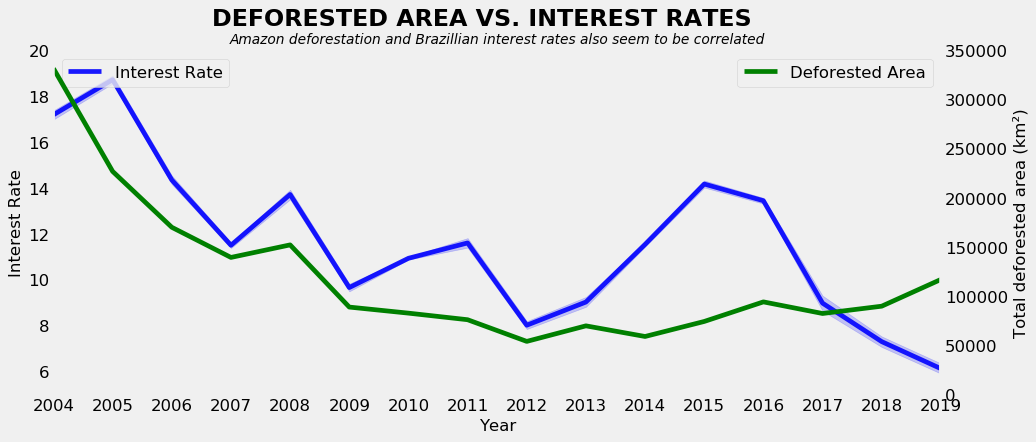

In [596]:
fig, ax = plt.subplots(figsize=(12,5), dpi=85)
plt.style.use('fivethirtyeight')

sns.lineplot(merged['year'], merged['interest rate'], color='blue', alpha=0.9, label='Interest Rate')
plt.grid(False)
ax.legend(loc= 'upper left')
ax.set_ylabel("Interest Rate", size="medium")
ax.set_xlabel("Year", size="medium")
plt.suptitle('DEFORESTED AREA VS. INTEREST RATES', fontweight='bold', fontsize='x-large')

ax.set_ylim(5, 20)
# ax.grid(axis='x')

ax2 = ax.twinx()
sns.lineplot(x=merged['year'], y=merged['Deforested Area (km²)'], estimator='sum', color="green", ci=None, ax=ax2, label='Deforested Area')
ax2.set_xticks(ticks=list(range(2004, 2020)))
ax2.set_xlim(2004, 2019)
ax2.set_ylabel("Total deforested area (km²)", size="medium")
ax2.set_ylim(0, 350000)
ax2.set_title('Amazon deforestation and Brazillian interest rates also seem to be correlated', fontsize='small', style='italic')


plt.grid(False)
ax2.legend();

Surprisingly, Brazillian interest rates and Amazon deforestation follow a similar trend. From 2004 to 2012, both lines dramatically decrease. Interest rates rise dramatically until 2015, and then rapidly decrease to 2019. Deforestation after 2012, however, increases not as dramatically each year until 2019. This similarity for me wasn't expected. As mentioned earlier, usually lower interest rates allow for more investment and borrowing. I would've assumed the deforestation would be worse when interest rates were lower since more money could be borrowing for logging, and deforestation would be less severe when interest rates were higher since it would be harder to invest and borrow money for logging.

## ML Pipeline Models

To further investigate what factors have had an impact on the deforestation of the Brazillian Amazon Rainforest, I decided to create  ML pipeline to accurately predict deforested area.



### Baseline Model

In [597]:
def baseline_model(df, keep):
    X = df[keep]
    y = df['Deforested Area (km²)']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) 

    pl = Pipeline([("stdsclr", StandardScaler()), ("lin-reg", LinearRegression())])
                  
    pl.fit(X_train,y_train)
    preds = pl.predict(X_test)
    r_sq = pl.score(X_test,y_test)
    rmse = np.sqrt(np.mean((preds - y_test)**2))
   
    return pl, r_sq, rmse

For my baseline model, I chose to predict deforested area using interest rates. For the transformer, I used StandardScaler which stadardizes features by subtracting the dataset by the mean and dividing by the standard deviation. I used a linear regression because from the previous chart, it seemed like there was a linear relationship between the two.

In [598]:
# baseline_model(merged_styr, ["firespots"])
baseline_model(merged, ["interest rate"])

(Pipeline(memory=None,
          steps=[('stdsclr',
                  StandardScaler(copy=True, with_mean=True, with_std=True)),
                 ('lin-reg',
                  LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                   normalize=False))],
          verbose=False), 0.07415499113981405, 1642.3744018378638)

From the initial run, I got an r-squared of 0.031 and a RMSE of 1646.541. Judging from the r-squared, the relationship between interest rates and deforested area didn't linearly related as the value of r-squared was way off from 1.00. My RMSE value was relatively large compared to the given values, which was also not ideal. 

0.06336716629606796

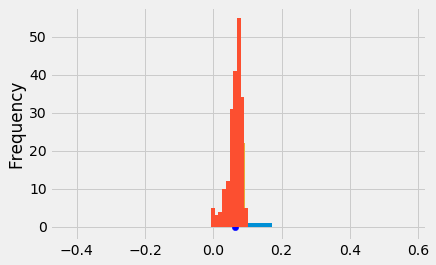

In [599]:
r_squared = []
for i in range(200):
#     r_squared.append(baseline_model(merged_styr, ["firespots"])[1])
    r_squared.append(baseline_model(merged, ["interest rate"])[1])

    pd.Series(r_squared).plot(kind='hist')
plt.scatter(np.mean(r_squared), 0, color='blue', s=40);
np.mean(r_squared)

After running a simulation of 200 trials of the baseline model, I plotted the frequency of r-squared values onto a histogram. We can see that average r-squared value was around 0.1, which isn't good. 

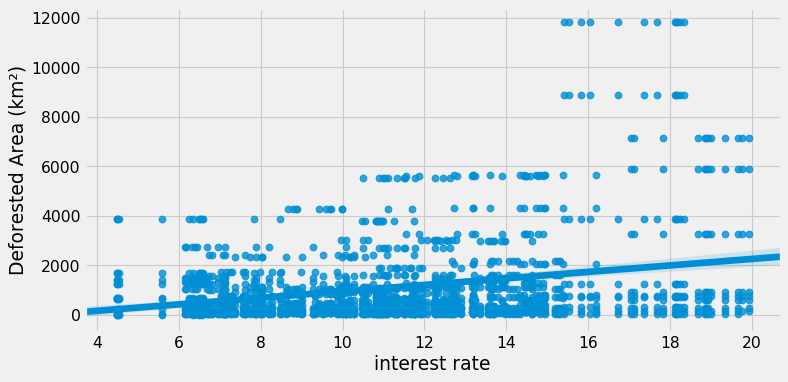

In [600]:
plt.figure(figsize=(10,5), dpi=80)
sns.regplot(data=merged, x='interest rate', y='Deforested Area (km²)')
plt.show()

We can see this scatter plot with a line that the predicted line doesn't really fit with the majority of datapoints. This means our baseline model wasn't accurate. 

### Updated Model

In [601]:
# Grouped merge by year and state
merged_styr = merged.groupby(['year','state']).mean()
merged_styr = merged_styr.reset_index()
merged_styr = merged_styr.drop(columns=['latitude', 'longitude'])
merged_styr

,year,state,Deforested Area (km²),month,firespots,interest rate
0,2004,ACRE,728.0,7.400000,727.100000,17.467900
1,2004,AMAPA,46.0,6.818182,310.272727,17.281636
2,2004,AMAZONAS,1232.0,6.500000,673.583333,17.137000
3,2004,MARANHAO,755.0,6.500000,953.583333,17.137000
4,2004,MATO GROSSO,11814.0,6.500000,5868.500000,17.137000
...,...,...,...,...,...,...
139,2019,MATO GROSSO,1685.0,6.500000,1456.583333,6.179075
140,2019,PARA,3862.0,6.500000,2475.000000,6.179075
141,2019,RONDONIA,1245.0,6.500000,933.833333,6.179075
142,2019,RORAIMA,617.0,6.500000,397.916667,6.179075


After starting off with the baseline model, I decided to groupby the merged dataframe by year and state. The previous line charts that compared area & fires and are & interest rates were plotted over year which gave the data the similar sort of line shape. This was why I grouped by year. I also had to group by state because when only grouping by year, the dataframe only contained 16 rows of data, which I believed was not enough for the model. I decided to aggregate the grouped data by mean as it would make most sense.

In [602]:
def updated_model(df, keep):
    X = df[keep]
    y = df["Deforested Area (km²)"]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) 
    
    quant_transformer = Pipeline(steps=[("stdsclr", StandardScaler())])
    cat_transformer = Pipeline(steps=[("one-hot", OneHotEncoder(handle_unknown='ignore'))])
    preproc = ColumnTransformer(transformers=[("quantitative", quant_transformer, ["firespots","interest rate"]),
                                              ("categorical", cat_transformer,["month"])])
    
    pl = Pipeline([("preprocessor", preproc), ("random-forest", LinearRegression())]) #pipeline

    pl.fit(X_train,y_train)
    pred = pl.predict(X_test)    
    r_sq = pl.score(X_test,y_test)
    rmse = np.sqrt(np.mean((pred - y_test)**2))
    
    return pl, r_sq, rmse    

In the updated model, I decided first to add in firespots and month as features. I added in firespots as I thought it would be a good predictor of deforested area, and I added month because it seemed like a good predictor of firespots and in turn would be a good predictor of deforested area.

In [603]:
updated_model(merged_styr,["firespots", "interest rate", "month"])

(Pipeline(memory=None,
          steps=[('preprocessor',
                  ColumnTransformer(n_jobs=None, remainder='drop',
                                    sparse_threshold=0.3,
                                    transformer_weights=None,
                                    transformers=[('quantitative',
                                                   Pipeline(memory=None,
                                                            steps=[('stdsclr',
                                                                    StandardScaler(copy=True,
                                                                                   with_mean=True,
                                                                                   with_std=True))],
                                                            verbose=False),
                                                   ['firespots',
                                                    'interest rate']),
                               

The updated model pipeline is comprised of a preprocessing ColumnTransformer and a LinearRegression model. The ColumnTransformer is made up of two transformers: StandardScaler and OneHotEncoder. The StandardScaler standardizes quantitative features, while OneHotEncoder encodes categorical features as a one-hot numeric array. After the first run of the model, I got an r-squared of .767 which was way higher than the baseline model and way closer to 1. The RSME was also lower than the baseline model, which was also good.

0.7645320557224448

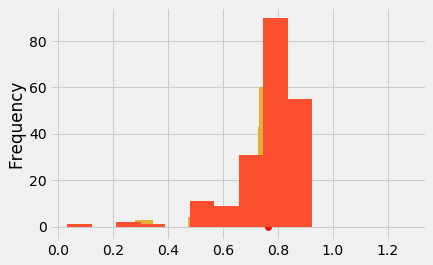

In [604]:
r_squared = []
for i in range(200):
    r_squared.append(updated_model(merged_styr,["firespots", "interest rate", "month"])[1])
    pd.Series(r_squared).plot(kind='hist')
plt.scatter(np.mean(r_squared), 0, color='red', s=40);
np.mean(r_squared)

After running a simulation of the updated model 200 times, I got an average r-squared of .772 We can see from this histogram that the distribution of r-squared values is way closer to 1.0. This means that this model performed pretty well and that firespots, interest rates, and months are a good predictor for the deforestated area of the Brazillian Amazon.

## Conclusion

This notebook is just a fairly preliminary dive into the complex issue that is the Amazon Rainforest and deforestation. The main thing I've learned from doing this analysis is that Amazon deforestation has been and still is a major issue in Brazil. Deforestation is back on the rise in Brazil. The rate of deforestation was worse in the early 2000s and comparatively, it has gotten better since then. In recent years, however, the rate of deforestation is rising and with the current Brazillian administration, it doesn't look like it's slowing down. From the prediction side, it seems like fires in the Amazon, Brazillian interest rates, and the time of year are all somewhat good indicators of how much deforestation is occuring in the Brazillian Amazon.